In [ ]:
# %pip install mplfinance
# %pip install plotly   

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
raw_data = pd.read_csv("../data/raw-data/prices-2015-2023.csv", index_col="Date", parse_dates=["Date"])
raw_data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-01-12,"2,051.60","2,033.20","2,067.30","2,033.10",272.35K,1.60%
2024-01-11,"2,019.20","2,029.40","2,056.10","2,017.30",301.34K,-0.42%
2024-01-10,"2,027.80","2,036.00","2,046.20","2,025.90",205.01K,-0.26%
2024-01-09,"2,033.00","2,034.50","2,048.60","2,031.90",218.75K,-0.02%
2024-01-08,"2,033.50","2,052.60","2,053.30","2,022.70",220.99K,-0.80%


The numbers in this data are not good: we need to get rid of ',' and 'k' and then convert them from strings to float type 

we will write a function that does that

In [11]:

df = raw_data.iloc[::-1]

# # Rename 'Price' column to 'Close'
df.rename(columns={'Price': 'Close'}, inplace=True)

# Remove commas and convert to float for the 'Close' column
df['Close'] = df['Close'].replace(",", "", regex=True).astype(float)
df['Open'] = df['Open'].replace(",", "", regex=True).astype(float)
df['High'] = df['High'].replace(",", "", regex=True).astype(float)
df['Low'] = df['Low'].replace(",", "", regex=True).astype(float)
df['Vol.'] = df['Vol.'].replace("K", "e3", regex=True).astype(float)

df.to_csv('../data/processed-data/price-gold.csv')
df.head()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-02,1186.2,1184.0,1194.9,1167.3,120680.0,0.18%
2015-01-05,1204.0,1187.8,1207.5,1177.8,149110.0,1.50%
2015-01-06,1219.4,1204.0,1223.3,1201.6,190360.0,1.28%
2015-01-07,1210.7,1219.0,1219.4,1209.1,117090.0,-0.71%
2015-01-08,1208.5,1211.0,1216.8,1204.2,122490.0,-0.18%


Date
2015-01-02            NaN
2015-01-05            NaN
2015-01-06    1203.200000
2015-01-07    1211.366667
2015-01-08    1212.866667
Name: Close, dtype: float64

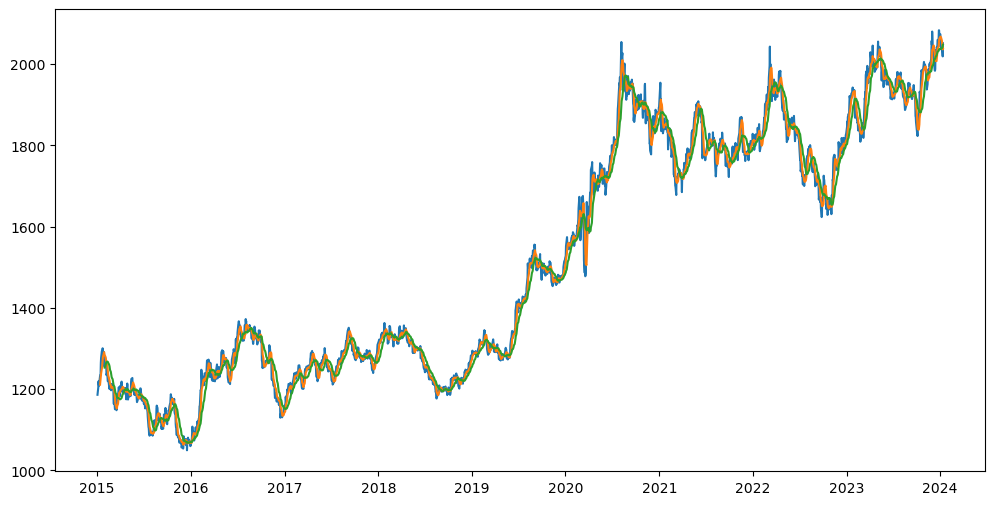

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close'].rolling(window=7).mean(), label='MA')
plt.plot(df['Close'].rolling(window=20).mean(), label='MA')
df['Close'].rolling(window=3).mean().head()

In [23]:
raw_callender = pd.read_csv('../data/raw-data/economic_calendar_19_24.csv')
raw_callender

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast
0,Tuesday,01/01/19,20:45,CN,Caixin Manufacturing PMI DEC,49.7,50.2,50.1,50.1
1,Friday,01/04/19,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K
2,Sunday,01/06/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
3,Monday,01/07/19,10:00,CA,Ivey PMI s.a DEC,59.7,57.2,56.8,56.7
4,Monday,01/07/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1871,Thursday,11/30/23,8:30,US,Personal Income MoM OCT,0.002,0.40%,0.002,0.003
1872,Thursday,11/30/23,8:30,US,Personal Spending MoM OCT,0.002,0.70%,0.002,0.004
1873,Thursday,11/30/23,20:45,CN,Caixin Manufacturing PMI NOV,50.7,49.5,49.8,49.8
1874,Friday,12/01/23,8:30,CA,Unemployment Rate NOV,0.058,5.70%,0.058,0.058


TypeError: 'tuple' object is not callable